![title](house_prices.jpg)

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import Imputer
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import export_graphviz
import graphviz

# Data loading and cleaning

## Data loading

In [2]:
df = pd.read_csv("house_sales_prices.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Retrait valeurs manquantes

In [5]:
df_with_dropped_na = df.dropna(axis=1)

In [6]:
df_with_dropped_na.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Conserver seulement les colonnes numériques

In [7]:
df_with_dropped_na.dtypes.head(12)

Id               int64
MSSubClass       int64
MSZoning        object
LotArea          int64
Street          object
LotShape        object
LandContour     object
Utilities       object
LotConfig       object
LandSlope       object
Neighborhood    object
Condition1      object
dtype: object

In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_numeric = df_with_dropped_na.select_dtypes(numerics)

# Data visualization

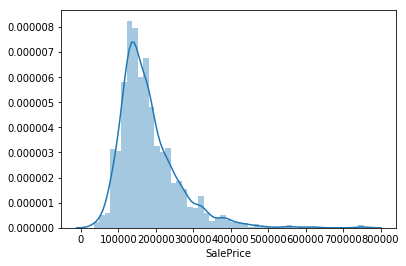

In [9]:
sns.distplot(df_numeric.SalePrice)

In [10]:
correlations = df_numeric.corr()
most_correlated_features = correlations["SalePrice"].sort_values(ascending=False)[:15]
most_correlated_features

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Fireplaces      0.466929
BsmtFinSF1      0.386420
WoodDeckSF      0.324413
2ndFlrSF        0.319334
Name: SalePrice, dtype: float64

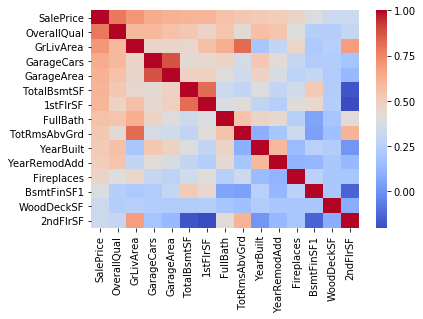

In [11]:
correlations_most_correlated_features = df_numeric[most_correlated_features.index].corr()
sns.heatmap(correlations_most_correlated_features, cmap="coolwarm")

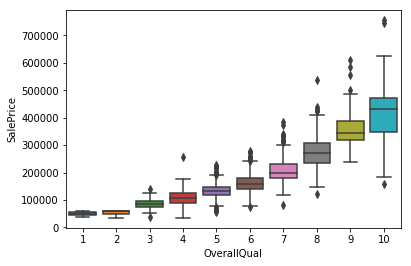

In [12]:
sns.boxplot(x=df_numeric.OverallQual, y=df_numeric.SalePrice)

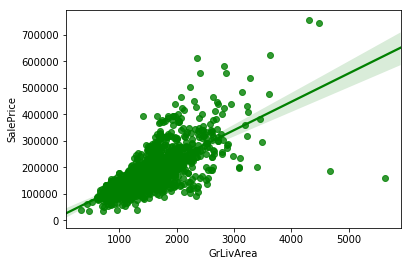

In [13]:
sns.regplot(x=df_numeric.GrLivArea, y=df_numeric.SalePrice, color="green")

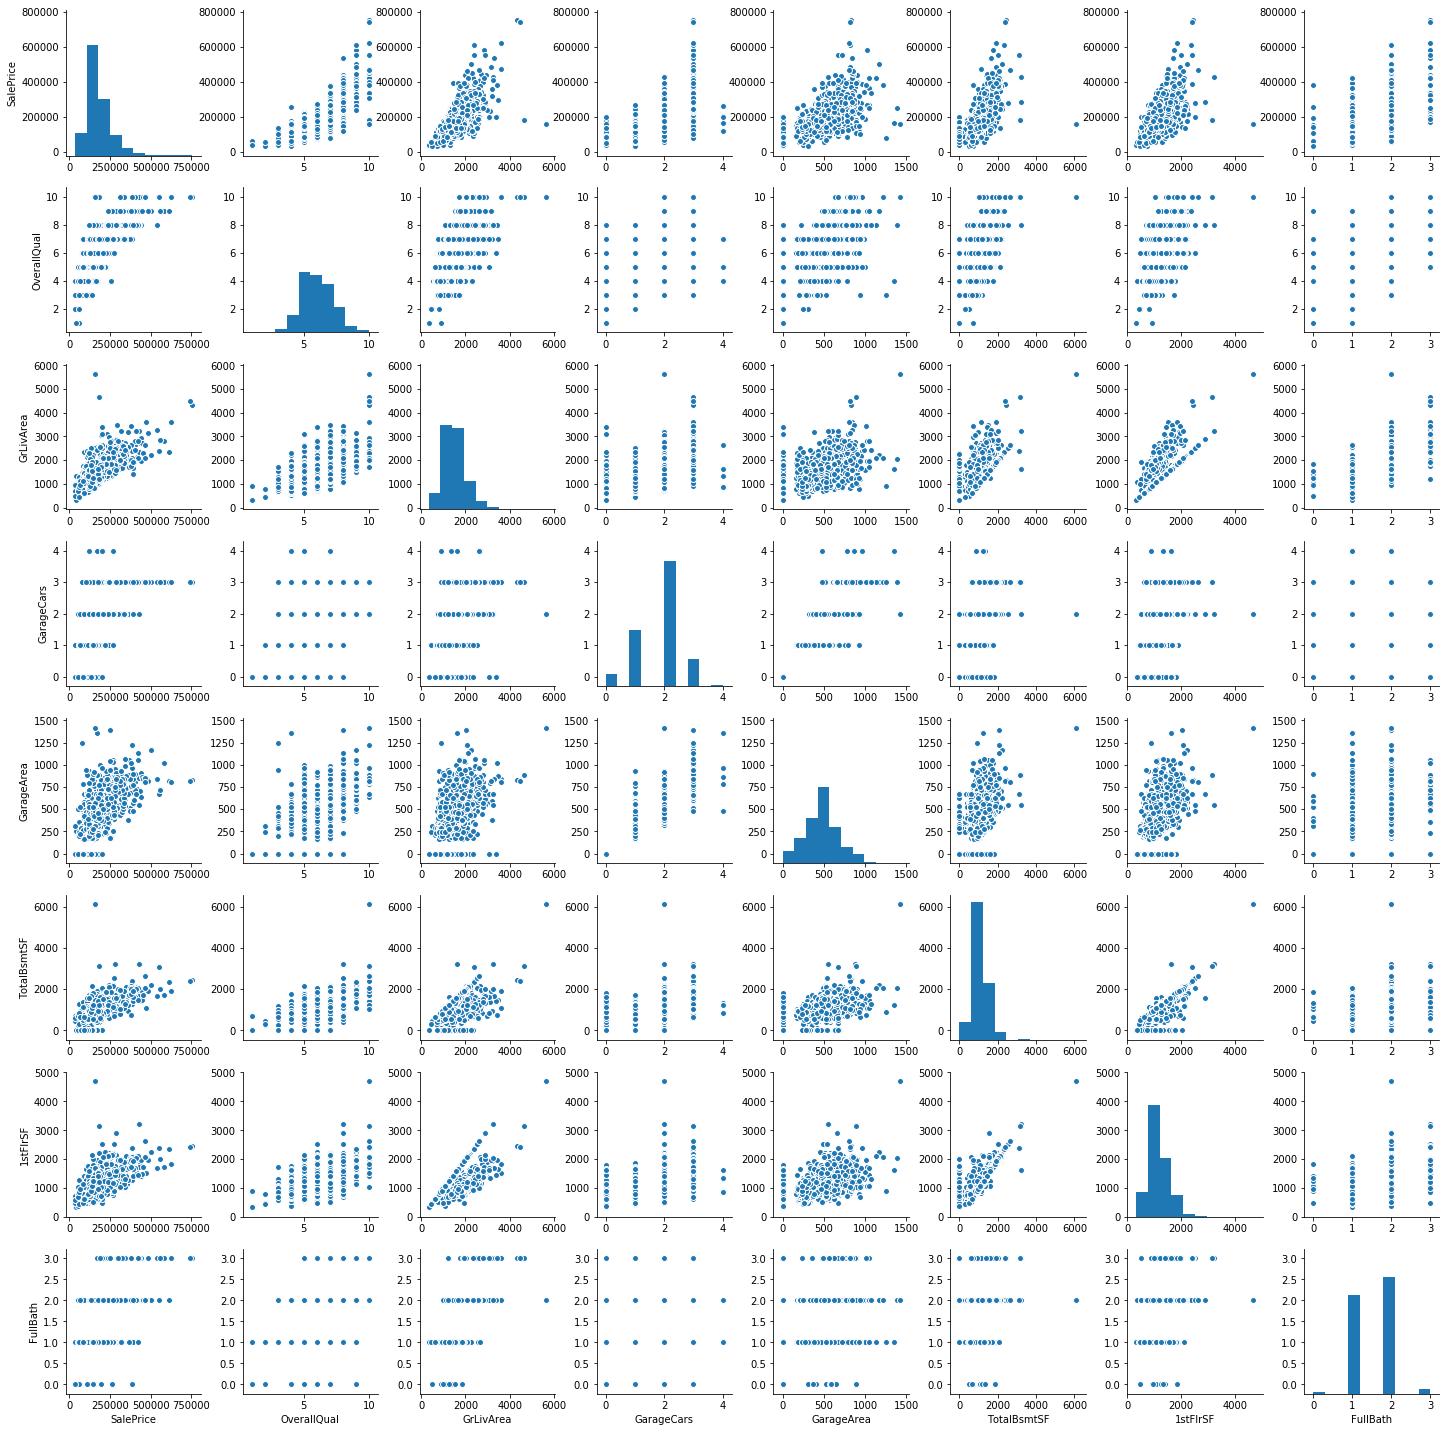

In [14]:
sns.pairplot(df_numeric[most_correlated_features.index[:8]])

# Premier modèle

## Cible et variables explicatives

In [15]:
target = "SalePrice"
y = df_numeric[target]

In [16]:
x = df_numeric.drop(target, axis=1)
features = x.columns.tolist()
x.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,8450,7,5,2003,2003,706,0,150,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,9600,6,8,1976,1976,978,0,284,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,11250,7,5,2001,2002,486,0,434,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,9550,7,5,1915,1970,216,0,540,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,14260,8,5,2000,2000,655,0,490,...,836,192,84,0,0,0,0,0,12,2008


## Séparation des données d'entraînement et de test

![title](training_test.png)

In [17]:
test_size_ratio = 0.2
random_state = 123
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                   random_state=123)

In [18]:
x_train.shape, x_test.shape

((1168, 34), (292, 34))

## Entraînement du modèle

In [19]:
tree_model = DecisionTreeRegressor(max_depth=8)

In [20]:
tree_model.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

## Prédictions sur l'ensemble d'apprentissage

In [21]:
predictions_train = tree_model.predict(x_train)
mean_absolute_error(predictions_train, y_train)

11607.950874365642

![title](r2.png)

In [22]:
r2_score(predictions_train, y_train)

0.957875059066847

In [23]:
predictions_vs_realite_train = pd.DataFrame({"predictions sur ensemble d'entrainement": predictions_train,
                                           "valeurs ensemble d'entrainement": y_train})
predictions_vs_realite_train.head(15)

,predictions sur ensemble d'entrainement,valeurs ensemble d'entrainement
318,300500.000000,260000
580,156859.096774,181900
961,253352.857143,272000
78,139863.923077,136500
5,139361.320755,143000
793,232428.571429,225000
1425,152995.833333,142000
1392,106025.258065,123000
585,406116.095238,369900
876,143824.719101,132250


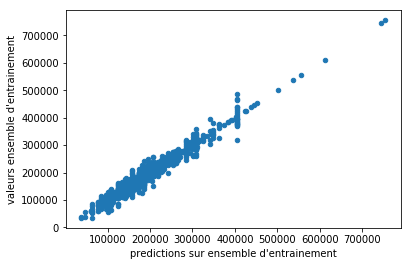

In [24]:
predictions_vs_realite_train.plot.scatter(x="predictions sur ensemble d'entrainement", y="valeurs ensemble d'entrainement")

## Predictions sur l'ensemble de test

In [25]:
predictions = tree_model.predict(x_test)
r2_score(predictions, y_test)

0.7454852878307139

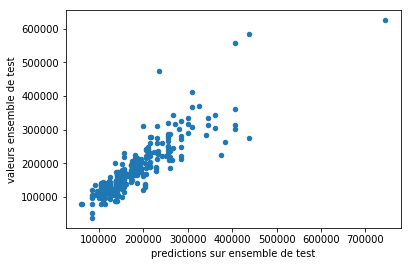

In [26]:
predictions_vs_realite = pd.DataFrame({"predictions sur ensemble de test": predictions,
                                       "valeurs ensemble de test": y_test})
predictions_vs_realite.plot.scatter(x="predictions sur ensemble de test", y="valeurs ensemble de test")

## Jetons un oeil à l'arbre

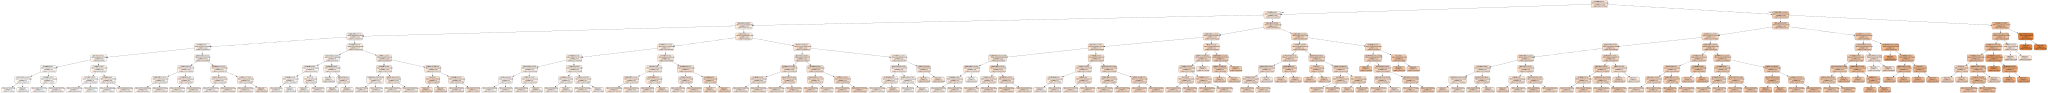

In [27]:
dot_data_tree = export_graphviz(tree_model, out_file=None, 
                         feature_names=features,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graphviz.Source(dot_data_tree)

# Recherche des meilleurs paramètres

![titile](training_and_test.png)

In [28]:
x_training, x_val, y_training, y_val = train_test_split(x_train, y_train)

In [29]:
params_grid = {"max_depth": [None] + list(range(2, 12)), 
               "min_samples_split": np.linspace(0.001, 0.1, 25), 
               "min_samples_leaf": np.linspace(0.001, 0.1, 25)}
# Créons la liste de toutes les combinaisons possibles de paramètres
params_combinations = list(map(lambda l: {"max_depth": l[0], 
                                          "min_samples_split": l[1],
                                          "min_samples_leaf": l[2]},
                               list(product(*(params_grid[key] for key in params_grid)))))

In [30]:
def get_score(params):
    tree = DecisionTreeRegressor(**params)
    tree.fit(x_training, y_training)
    predictions = tree.predict(x_val)
    score = r2_score(predictions, y_val)
    return score

# Pour chaque combinaison de paramètre, entraînons un arbre
# et calculons son taux d'erreur sur l'ensemble de validation
scores = [get_score(param_combination) 
          for param_combination in params_combinations]

In [31]:
max_score = max(scores)
print("Score du meilleur modèle: %s" % max_score)
best_score_index = scores.index(max_score)
best_params = params_combinations[best_score_index]
best_tree = DecisionTreeRegressor(**best_params).fit(x_train, y_train)
print("Score du meilleur modèle sur l'ensemble de test: %s" % best_tree.score(x_test, y_test))

print("Meilleurs paramètres: %s" % best_params)

Score du meilleur modèle: 0.7947958861081237
Score du meilleur modèle sur l'ensemble de test: 0.7592875538316364
Meilleurs paramètres: {'max_depth': None, 'min_samples_split': 0.013375000000000001, 'min_samples_leaf': 0.001}


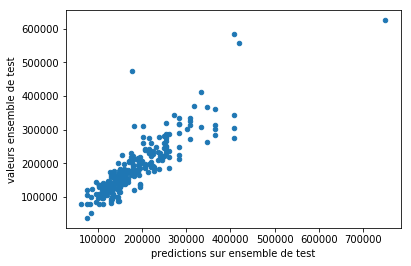

In [32]:
predictions_best_tree_vs_realite = pd.DataFrame({"predictions sur ensemble de test": best_tree.predict(x_test),
                                       "valeurs ensemble de test": y_test})
predictions_best_tree_vs_realite.plot.scatter(x="predictions sur ensemble de test", y="valeurs ensemble de test")

# Validation croisée

![title](kfolds.jpg)

In [33]:
def get_cross_val_score(params):
    scores = []
    x_train_matrix = x_train.as_matrix()
    y_train_matrix = y_train.as_matrix()
    # Créons six sous-ensembles (folds) de taille égale
    kfold = KFold(n_splits=6)
    # Et récupérons tous les ensembles d'entraînement et de validation possibles
    for train_indices, val_indices in kfold.split(x_train_matrix):
        x_train_k = x_train_matrix[train_indices, :]
        y_train_k = y_train_matrix[train_indices]
        x_val_k = x_train_matrix[val_indices, :]
        y_val_k = y_train_matrix[val_indices]
        # Pour chacun de ces sous-ensembles, entraînons un modèle et récupérons son score
        tree = DecisionTreeRegressor(**params)
        tree.fit(x_train_k, y_train_k)
        predictions = tree.predict(x_val_k)
        score = r2_score(predictions, y_val_k)
        scores.append(score)
    # Renvoyons la moyenne des scores
    return np.mean(scores)

In [34]:
get_cross_val_score(best_params)

0.6998664747011403

In [35]:
# Recalculons les scores de chacune des combinaisons de paramètres
cv_scores = [get_cross_val_score(param_combination)
             for param_combination in params_combinations]

In [36]:
max_score_cv = max(cv_scores)
print("Score du meilleur modèle: %s" % max_score_cv)
best_score_index_cv = cv_scores.index(max_score_cv)
best_params_cv = params_combinations[best_score_index_cv]
best_tree_cv = DecisionTreeRegressor(**best_params_cv).fit(x_train, y_train)
print("Score du meilleur modèle sur l'ensemble de test: %s" % best_tree_cv.score(x_test, y_test))

print("Meilleurs paramètres: %s" % best_params_cv)

Score du meilleur modèle: 0.7216509081360051
Score du meilleur modèle sur l'ensemble de test: 0.759815459066798
Meilleurs paramètres: {'max_depth': 10, 'min_samples_split': 0.013375000000000001, 'min_samples_leaf': 0.001}


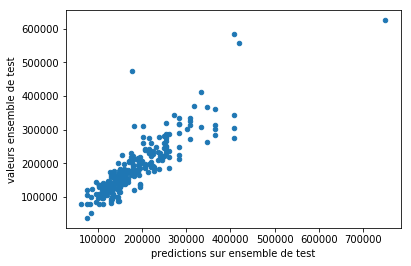

In [37]:
predictions_vs_realite_cv = pd.DataFrame({"predictions sur ensemble de test": best_tree.predict(x_test),
                                       "valeurs ensemble de test": y_test})
predictions_best_tree_vs_realite.plot.scatter(x="predictions sur ensemble de test", y="valeurs ensemble de test")

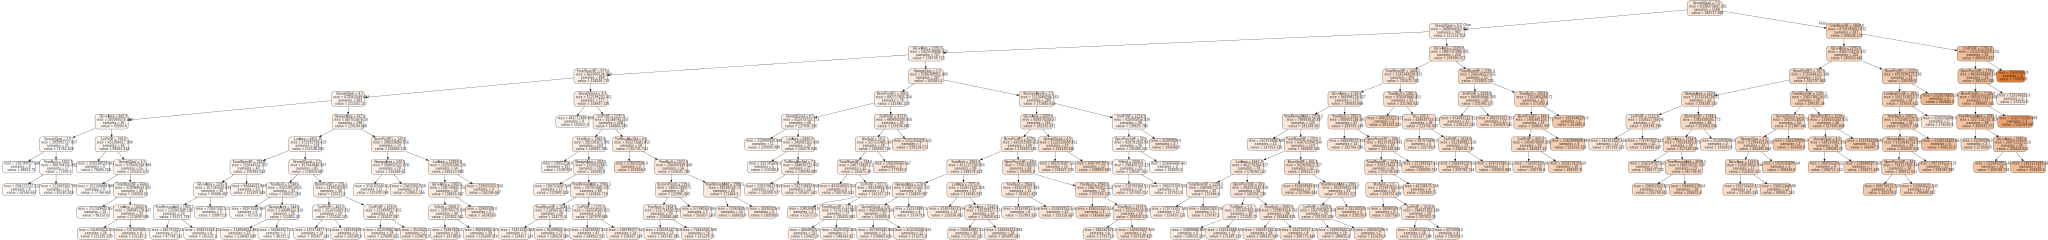

In [38]:
dot_data = export_graphviz(best_tree_cv, out_file=None, 
                         feature_names=features,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graphviz.Source(dot_data)

# Compromis biais variance

![title](bootstrap.png)

In [39]:
n_samples = 1000
sample_size = 1000
pool_size = x_train.shape[0]

def get_bootstrap_sample(pool_size=pool_size, sample_size=sample_size):
    return np.random.choice(range(pool_size), size=sample_size, replace=True)

samples = [get_bootstrap_sample() for _ in range(n_samples)]

In [40]:
def train_individual_tree(sample, max_depth=2):
    x_train_sample = x_train.as_matrix()[sample, :]
    y_train_sample = y_train.as_matrix()[sample]
    tree_sample = DecisionTreeRegressor(max_depth=max_depth)
    return tree_sample.fit(x_train_sample, y_train_sample)

mean_bias, mean_variance = [], []
scores_one_tree = []
max_depths = range(1, 25, 2)
# Pour différentes valeurs de profondeur possibles...
for depth in max_depths:
    # On va entraîner des arbres de décision, un par échantillon bootstrap
    tree_samples = [train_individual_tree(sample, depth) for sample in samples]
    predictions_tree_samples = [tree.predict(x_test) for tree in tree_samples]
    # On calcule les taux d'erreur de chacun des arbres...
    error_rates = np.concatenate([(np.abs(x - y_test) / y_test).values.reshape(len(y_test), 1) 
                                for x in predictions_tree_samples],
                              axis=1)
    # Et on en déduit un taux d'erreur moyen, ou bias
    mean_bias.append(np.mean(np.mean(error_rates, axis=1)))
    # et la variance des erreurs
    mean_variance.append(np.mean(np.std(error_rates, axis=1)))
    
    one_tree = DecisionTreeRegressor(max_depth=depth).fit(x_train, y_train)
    scores_one_tree.append(one_tree.score(x_test, y_test))

Text(0.5,1,'Évolution du biais en fonction de la profondeur des arbres')

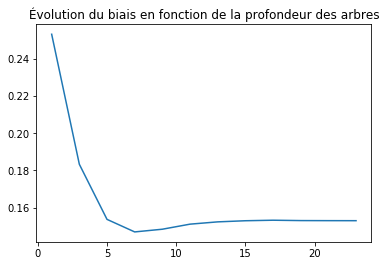

In [41]:
plt.plot(max_depths, mean_bias)
plt.title(u"Évolution du biais en fonction de la profondeur des arbres")

Text(0.5,1,'Évolution de la variance en fonction de la profondeur des arbres')

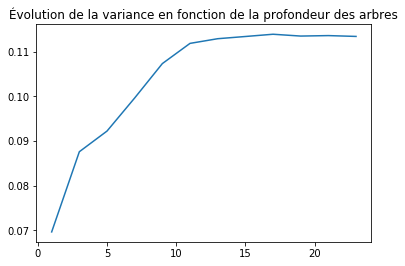

In [42]:
plt.plot(max_depths, mean_variance)
plt.title(u"Évolution de la variance en fonction de la profondeur des arbres")

Text(0.5,1,"Évolution du score d'un seul arbre en fonction de la profondeur")

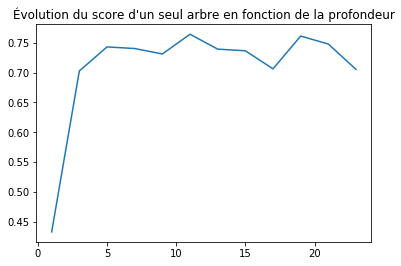

In [43]:
plt.plot(max_depths, scores_one_tree)
plt.title(u"Évolution du score d'un seul arbre en fonction de la profondeur")

![title](bias_variance.png)

# Aggrégation bootstrap (bagging)

In [44]:
score_bootstrap_aggregation_predictions = []
# Pour chaque profondeur possible...
for depth in max_depths:
    # On va maintenant prédire la moyenne des prédictions des arbres
    # entraînés sur les échantillons bootstrap
    tree_samples = [train_individual_tree(sample, depth) for sample in samples]
    predictions_tree_samples = [tree.predict(x_test) for tree in tree_samples]
    bootstrap_aggregation_predictions = sum(predictions_tree_samples) / n_samples
    score_bootstrap_aggregation_predictions.append(
        r2_score(y_test, bootstrap_aggregation_predictions))

Text(0.5,1,"Évolution de l'erreur de l'aggrégation bootstrap en fonction de la profondeur")

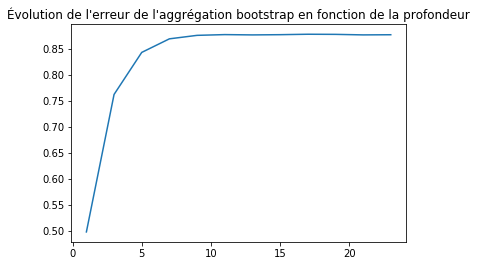

In [45]:
plt.plot(max_depths, score_bootstrap_aggregation_predictions)
plt.title(u"Évolution de l'erreur de l'aggrégation bootstrap en fonction de la profondeur")

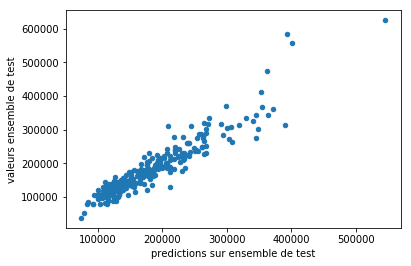

In [46]:
# Visualisons les prédictions pour des arbres de profondeur 10
tree_samples = [train_individual_tree(sample, 10) for sample in samples]
predictions_tree_samples = [tree.predict(x_test) for tree in tree_samples]
bootstrap_aggregation_predictions = sum(predictions_tree_samples) / n_samples

predictions_vs_realite_bootstrap_aggregation = pd.DataFrame({"predictions sur ensemble de test": bootstrap_aggregation_predictions,
                                       "valeurs ensemble de test": y_test})
predictions_vs_realite_bootstrap_aggregation.plot.scatter(x="predictions sur ensemble de test", y="valeurs ensemble de test")

## Forêt d'arbres aléatoires

![title](random_forest.png)

In [47]:
rf = RandomForestRegressor(max_depth=10, n_estimators=1000, n_jobs=-1)

In [48]:
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [49]:
rf.score(x_test, y_test)

0.8779155650246022

# Boosting

![title](boosting_trees.png)

In [51]:
gbm = GradientBoostingRegressor(n_estimators=100, criterion="mse")
gbm.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [52]:
gbm.score(x_test, y_test)

0.8959108412433004

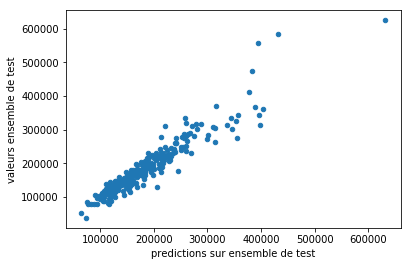

In [53]:
predictions_vs_realite_gbm = pd.DataFrame({"predictions sur ensemble de test": gbm.predict(x_test),
                                       "valeurs ensemble de test": y_test})
predictions_vs_realite_gbm.plot.scatter(x="predictions sur ensemble de test", y="valeurs ensemble de test")

# Feature engineering

## Dummificaton

TODO: Remplacer les colonnes contenant des variables catégorielles par des colonnes contenant des 0 et des 1, indicant si l'échangillon appartient ou non à la catégorie

In [54]:
df_dummified = pd.get_dummies(df)
df_dummified.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


### Vérifions l'impact

In [55]:
df_dummified_dropped_na = df_dummified.dropna()
y_dummified_dropped_na = df_dummified_dropped_na[target]
x_dummified_dropped_na = df_dummified_dropped_na.drop(target, axis=1)

In [57]:
x_train_dummified_dropped_na, x_test_dummified_dropped_na,\
y_train_dummified_dropped_na, y_test_dummified_dropped_na = \
            train_test_split(x_dummified_dropped_na, y_dummified_dropped_na, 
                             test_size=0.2, random_state=123)


In [58]:
gbm = GradientBoostingRegressor(n_estimators=100, criterion="mse")
gbm.fit(x_train_dummified_dropped_na, y_train_dummified_dropped_na)
gbm.score(x_test_dummified_dropped_na, y_test_dummified_dropped_na)

0.7943149700300729

## Imputation des valeurs manquantes

TODO: récupérer les données de départ, et remplacer les valeurs manquantes par la moyenne ou la médianne des valeurs de la colonne

In [59]:
y_dummified = df_dummified[target]
x_dummified = df_dummified.drop(target, axis=1)

In [60]:
x_train_dummified, x_test_dummified,\
y_train_dummified, y_test_dummified = train_test_split(x_dummified, y_dummified, test_size=0.2, 
                                                   random_state=123)


In [61]:
mean_imputer = Imputer(strategy="mean")
x_train_no_na = mean_imputer.fit_transform(x_train_dummified)
x_test_no_na = mean_imputer.transform(x_test_dummified)

### Vérifions l'impact

In [62]:
gbm = GradientBoostingRegressor(n_estimators=100, criterion="mse")
gbm.fit(x_train_no_na, y_train_dummified)
gbm.score(x_test_no_na, y_test_dummified)

0.9065251866367037